# Counting things

i.e. connected component analysis

Pixel neighborhoods.

1 jump or two jump

1 jump maybe at if everything is very lined up.

2 jumps would deal with angles


These are the same as 4 neighborhood and 8 neighborhood.

In [23]:
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = ski.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = ski.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = ski.measure.label(binary_mask, connectivity=connectivity, return_num=True)
    return labeled_image, count

labeled_image, count = connected_components(filename="../data/raw/training/shapes-01.jpg", sigma=7.0, t=0.9, connectivity=2)

print (f"Number of connected components: {count}")
print (f"Number of connected components: {len(np.unique(labeled_image)) - 1}")

Number of connected components: 9
Number of connected components: 9


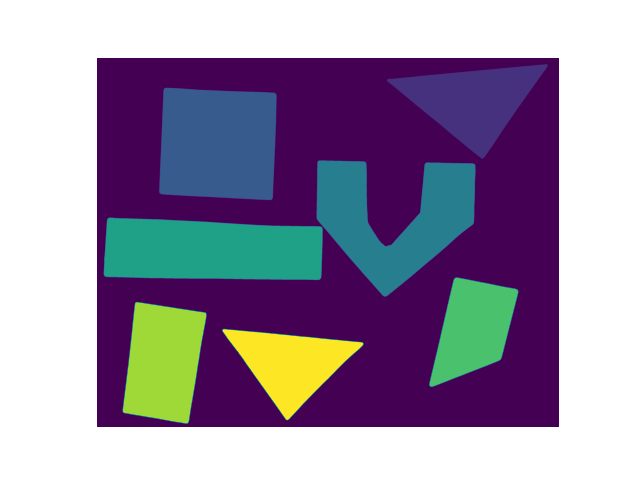

In [21]:
fig, ax = plt.subplots()
ax.imshow(labeled_image)
ax.set_axis_off();

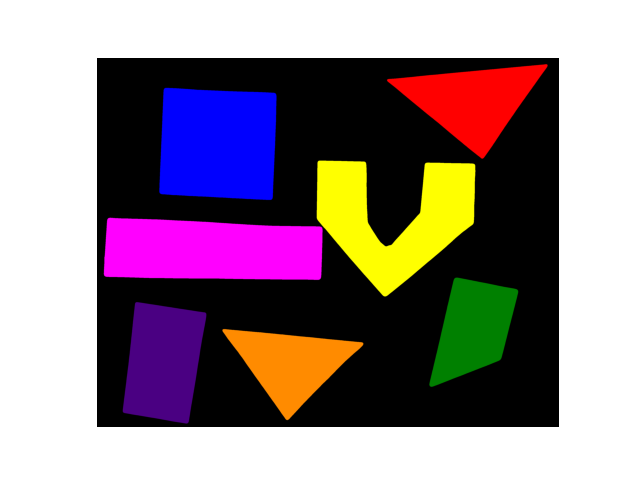

In [22]:
colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)

fig, ax = plt.subplots()
ax.imshow(colored_label_image)
ax.set_axis_off();